In [1]:
import os
os.chdir('C:\\Users\\prudi\\Desktop\\Data Sets\\Stack overflow tag')

In [34]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [11]:
df=pd.read_csv('stack-overflow-data.csv')
df=df[pd.notnull(df['tags'])]
print(df.head())

                                                post         tags
0  what is causing this behavior  in our c# datet...           c#
1  have dynamic html load as if it was in an ifra...      asp.net
2  how to convert a float value in to min:sec  i ...  objective-c
3  .net framework 4 redistributable  just wonderi...         .net
4  trying to calculate and print the mean and its...       python


In [23]:
df.shape

(40000, 2)

In [14]:
print(df['post'].apply(lambda x: len(x.split(' '))).sum())

10286120


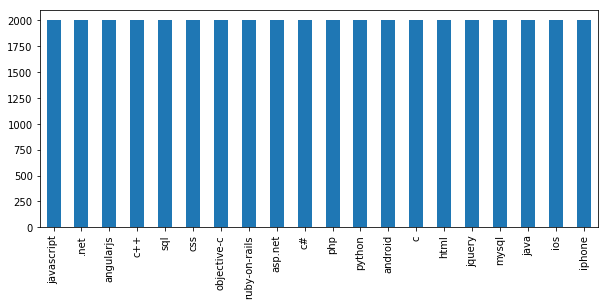

In [20]:
my_tags=df['tags'].unique()
plt.figure(figsize=(10,4))
df['tags'].value_counts().plot(kind='bar')

In [21]:
def print_plot(index):
    example = df[df.index == index][['post', 'tags']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

print_plot(10)

when we need interface c# <blockquote>    <strong>possible duplicate:</strong><br>   <a href= https://stackoverflow.com/questions/240152/why-would-i-want-to-use-interfaces >why would i want to use interfaces </a>   <a href= https://stackoverflow.com/questions/9451868/why-i-need-interface >why i need interface </a>    </blockquote>     i want to know where and when to use it     for example    <pre><code>interface idemo {  // function prototype  public void show(); }  // first class using the interface class myclass1 : idemo {  public void show()  {   // function body comes here   response.write( i m in myclass );  }  }  // second class using the interface class myclass2 : idemo {  public void show()   {   // function body comes here   response.write( i m in myclass2 );   response.write( so  what  );  } </code></pre>   these two classes has the same function name with different body. this can be even achieved without interface. then why we need an interface where and when to use it
Tag:

In [22]:
print_plot(30)

how to chain expressions inside ngclass when using the {...}[] form  how can i add another expression to an <code>ng-class</code> directive that uses this form:   <pre><code>ng-class= {true: loading   false: loading-done }[data.loader===null]  </code></pre>   i d like to add something like this to the list:   <pre><code>{highlight:isspecial} </code></pre>   is it possible without expanding the first expression     thanks.
Tag: angularjs


In [32]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['post'] = df['post'].apply(clean_text)
print_plot(10)

need interface c# possible duplicate would want use interfaces need interface want know use example interface idemo function prototype public void show first class using interface class myclass1 idemo public void show function body comes responsewrite myclass second class using interface class myclass2 idemo public void show function body comes responsewrite myclass2 responsewrite two classes function name different body even achieved without interface need interface use
Tag: c#


In [33]:
df['post'].apply(lambda x: len(x.split(' '))).sum()

3424297

In [37]:
X=df.post
Y=df.tags

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [39]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [40]:
nb.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [41]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

Wall time: 2.1 s


In [43]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('*'*50,'Classification Report','*'*50)
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7395
************************************************** Classification Report **************************************************
               precision    recall  f1-score   support

           c#       0.63      0.65      0.64       613
      asp.net       0.94      0.86      0.90       620
  objective-c       0.87      0.92      0.90       587
         .net       0.70      0.77      0.73       586
       python       0.73      0.87      0.79       599
    angularjs       0.72      0.51      0.60       589
       iphone       0.77      0.74      0.75       594
ruby-on-rails       0.69      0.89      0.78       610
          ios       0.63      0.59      0.61       617
            c       0.57      0.65      0.60       587
          sql       0.70      0.50      0.59       611
         java       0.79      0.78      0.79       594
       jquery       0.84      0.59      0.69       619
          css       0.66      0.84      0.74       574
          c++       0.64      0.83

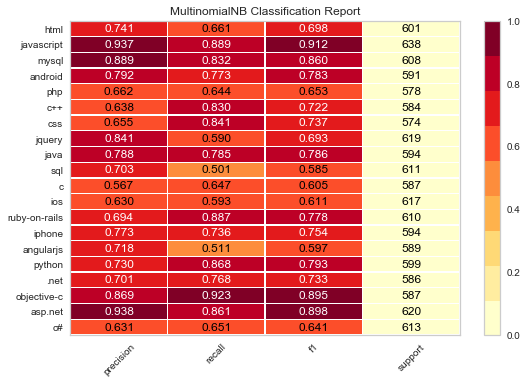

In [47]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(nb, classes=my_tags, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data